In [9]:
import os, sys

os.getcwd()

'/home/angad/Projects/quantcomp/ocean/QuantumComputingProject/GraphColor'

In [62]:
# Import libraries and dataframes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = "asset_class" # Values: asset_class, sectors, ftse

quant_res_df = pd.read_csv("ResultCSVs/grphcolor_quant_%s_res.csv" % (dataset))
class_res_df = pd.read_csv("ResultCSVs/grphcolor_class_%s_res.csv" % (dataset))

quant_res_df = quant_res_df.drop(axis=1, columns=['Unnamed: 0'])
class_res_df = class_res_df.drop(axis=1, columns=['Unnamed: 0'])

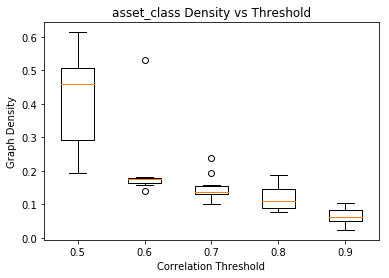

In [56]:
# Plot graph density for each threshold. 

thresh_array = quant_res_df['threshold'].unique()
density_distr = []

for thresh in thresholds:
    density = quant_res_df[quant_res_df.threshold == thresh]['density']
    density_distr.append(density)
    
plt.boxplot(density_distr, labels=[0.5, 0.6, 0.7, 0.8, 0.9])
plt.ylabel("Graph Density")
plt.xlabel("Correlation Threshold")
plt.title("%s Density vs Threshold" % (dataset))
plt.show()

<Figure size 432x288 with 0 Axes>

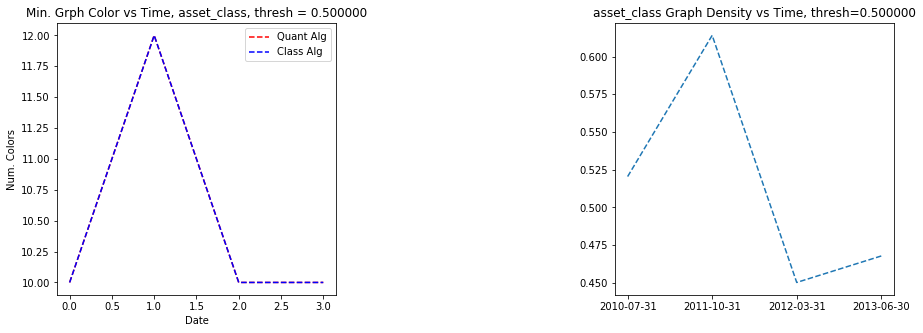

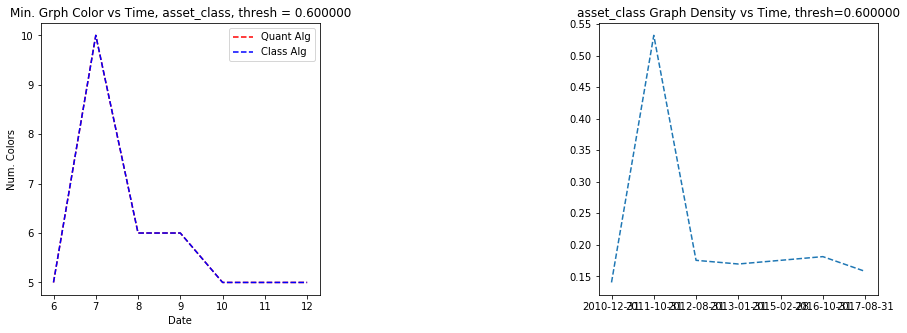

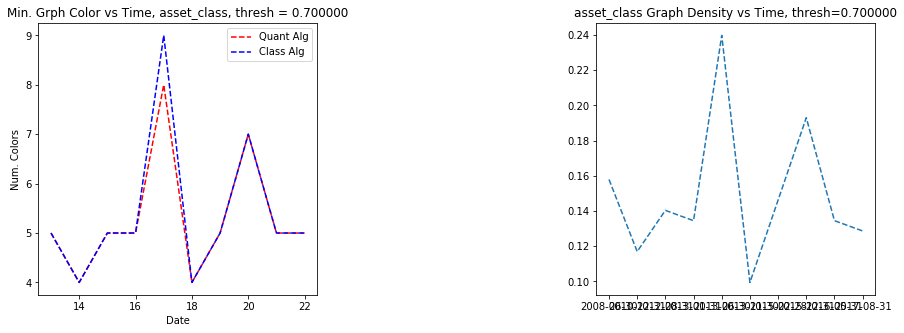

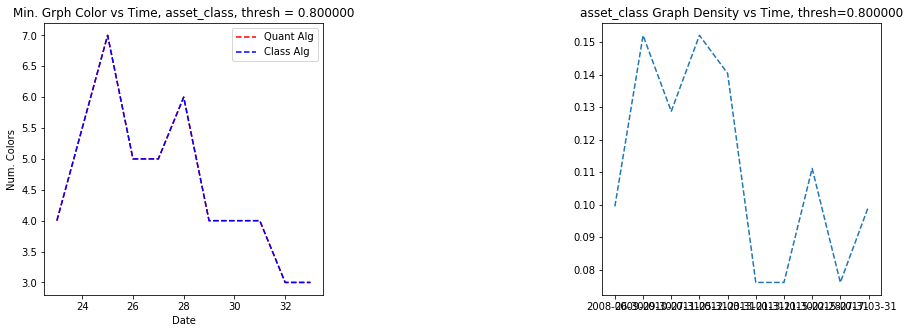

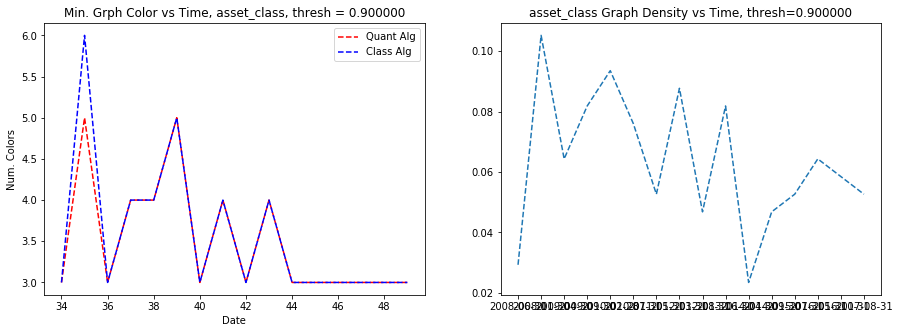

In [98]:
# Plot score vs time for each threshold
thresholds = quant_res_df['threshold'].unique()

i = 1
for thresh in thresholds:
    quant_series = quant_res_df[(quant_res_df.threshold == thresh) & (quant_res_df.valid_coloring == True)]
    class_series = class_res_df[(class_res_df.threshold == thresh) & (class_res_df.valid_coloring == True)]
    class_series = class_series[class_series['date'].isin(quant_series['date'])]
    
    assert quant_series.shape == class_series.shape
    
    fig = plt.figure(i)
    plt.subplots_adjust(wspace=1)
    plt.subplots(figsize=(15,5))
    
    plt.subplot(121)
    plt.title('Min. Grph Color vs Time, %s, thresh = %f' % (dataset, thresh))
    plt.ylabel('Num. Colors')
    plt.xlabel('Date')
    
    plt.plot(quant_series['num_colors'], 'r--', label='Quant Alg')
    plt.plot(class_series['num_colors'], 'b--', label='Class Alg')
    plt.legend(loc=0)
    
    plt.subplot(122)
    plt.title('%s Graph Density vs Time, thresh=%f' % (dataset, thresh))
    plt.plot(quant_series['date'], quant_series['density'], '--')
    
    plt.savefig('../ReportFiguresPlots/GraphColor/%s_score_density_time_thresh_%f.png' % (dataset, thresh))
    
    i += 1